# BOSTON HOUSE PRICE PREDICTION

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.datasets import load_boston

In [8]:
boston=load_boston()

In [9]:
print(boston)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [12]:
boston_x=pd.DataFrame(boston.data,columns=boston.feature_names)
boston_y=pd.DataFrame(boston.target)

In [13]:
boston_x.info

<bound method DataFrame.info of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1      

In [15]:
boston_x.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [17]:
boston_x.shape


(506, 13)

In [18]:
boston_x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [19]:
boston_y.head()

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [20]:
reg=linear_model.LinearRegression()

In [36]:
x_train,x_test,y_train,y_test=train_test_split(boston_x,boston_y,test_size=0.33,random_state=4)

In [37]:
x_train.shape

(339, 13)

In [38]:
y_train.shape

(339, 1)

In [39]:
x_test.shape

(167, 13)

In [40]:
y_test.shape

(167, 1)

In [41]:
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
print(reg.coef_)

[[-1.27149319e-01  5.65875486e-02 -1.37069867e-02  4.60767960e+00
  -1.52735697e+01  2.92035575e+00 -2.10126394e-03 -1.52360831e+00
   3.60553052e-01 -1.57139593e-02 -7.35205751e-01  8.26252371e-03
  -5.21205460e-01]]


In [46]:
print(reg.intercept_)

[38.29037682]


In [49]:
boston_pred=reg.predict(x_test)
boston_pred

array([[11.16275297],
       [26.44190658],
       [17.59145641],
       [19.42954113],
       [35.69438136],
       [24.69485981],
       [30.93865751],
       [19.96785741],
       [19.16458488],
       [23.61268691],
       [27.97117103],
       [28.36349306],
       [19.56062599],
       [33.1410532 ],
       [21.19294933],
       [15.22997909],
       [20.86232717],
       [11.34738312],
       [12.31703739],
       [14.31929401],
       [ 5.48697437],
       [17.03471246],
       [20.65927684],
       [22.4833684 ],
       [16.15339129],
       [20.463437  ],
       [19.38037622],
       [14.30337419],
       [21.43255518],
       [17.63675637],
       [14.62687428],
       [23.67151199],
       [32.89606627],
       [22.06234679],
       [17.68826928],
       [19.65450888],
       [29.7996257 ],
       [34.08112087],
       [24.11410961],
       [24.34871477],
       [35.31862959],
       [31.110035  ],
       [19.48793436],
       [31.23507799],
       [34.22034777],
       [25

In [50]:
print(y_test)

        0
8    16.5
289  24.8
68   17.4
211  19.3
226  37.6
..    ...
189  34.9
419   8.4
488  15.2
480  23.0
43   24.7

[167 rows x 1 columns]


In [64]:
from sklearn.metrics import mean_squared_error
print("Mean squared error")
print( mean_squared_error(y_test,boston_pred))



Mean squared error
30.90453452435599


In [65]:
from sklearn.metrics import mean_absolute_error
print("Mean absolute error")
print(mean_absolute_error(y_test,boston_pred))



Mean absolute error
3.9290305534500627


In [66]:
from sklearn.metrics import r2_score
print("R2 Score")
print(r2_score(y_test,boston_pred))




R2 Score
0.7221493423195633


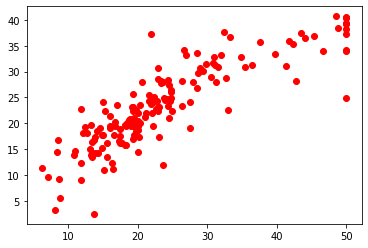

In [75]:
plt.scatter(y_test, boston_pred, color='red')
plt.show()